In [2]:
import numpy as np
from matplotlib import pyplot as plt
from cicTools import *
from astropy.io import ascii
from scipy import spatial



In [4]:

voidsfile = '../data/voids_1e11.dat'
voids = ascii.read(voidsfile,\
            names=['r','x','y','z','vx','vy','vz',\
                'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
print(voids[1])
rv, xv, yv, zv = voids[1]['r'], voids[1]['x'], voids[1]['y'], voids[1]['z']
print(rv,xv,yv,zv)

   r         x         y         z           vx          vy         vz     deltaint_1r maxdeltaint_2-3r log10Poisson Nrecenter
-------- --------- --------- ---------- ----------- ----------- ---------- ----------- ---------------- ------------ ---------
10.68731 144.21109 82.834099 120.857124 -124.143471 -320.220917 134.003983   -0.904106        -0.159599  -115.649681       557
10.68731 144.21109 82.834099 120.857124


In [5]:
gxs = readTNG()

In [6]:
pos = np.column_stack((gxs['x'],gxs['y'],gxs['z']))
pos/=1000.
tree = spatial.cKDTree(pos)

In [7]:
ids=tree.query_ball_point([xv, yv, zv],3*rv)
vgxs=pos[ids]

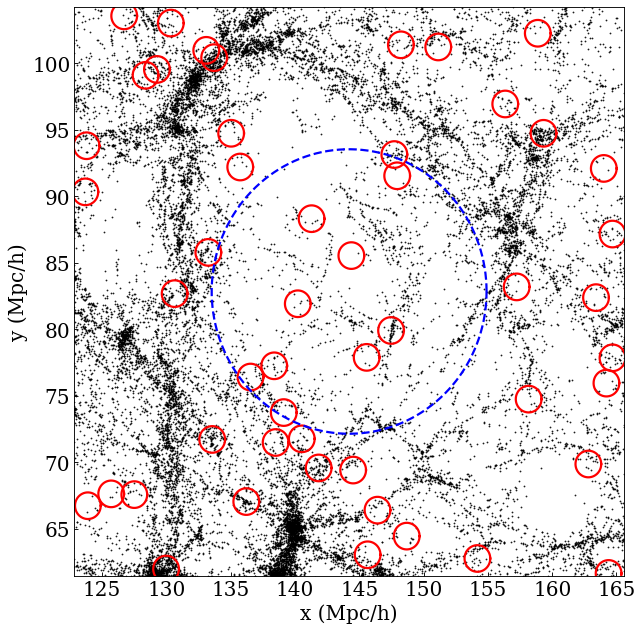

In [60]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

import seaborn as sns

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

mask=np.where(np.logical_and(vgxs[:,2]>zv-5,vgxs[:,2]<zv+5))[0]
#plt.hist2d(vgxs[mask][:,0],vgxs[mask][:,1],bins=512,density=True)
#plt.hist2d(vgxs[:,0],vgxs[:,1],bins=512)

plt.scatter(vgxs[mask][:,0],vgxs[mask][:,1],s=0.3,c='k')


theta = np.linspace(0,2*np.pi,150)

xlim1=xv-2*rv
xlim2=xv+2*rv
ylim1=yv-2*rv
ylim2=yv+2*rv
np.random.seed(12312313)
for i in range(50):
    
    a=np.cos(theta)+np.random.uniform(xlim1,xlim2)
    b=np.sin(theta)+np.random.uniform(ylim1,ylim2)
    plt.plot(a,b,c='r',lw=2)

a = rv*np.cos(theta)+xv
b = rv*np.sin(theta)+yv
plt.plot(a,b,ls='--',lw=2,c='b')

plt.xlabel('x (Mpc/h)',fontsize=fs)
plt.ylabel('y (Mpc/h)',fontsize=fs)
plt.xlim(xlim1,xlim2)
plt.ylim(ylim1,ylim2)

plt.tight_layout()
#plt.savefig('../plots/vpfcharla_intro.png')
plt.show()